<a href="https://colab.research.google.com/github/AceRb6/Analitica-y-visualizacion-avanzada-de-datos/blob/main/Practica07_AVDA_CPIDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 7**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Clasificacion con redes convolucionales

Este código tiene como objetivo utilizar un modelo de red neuronal preentrenado, específicamente ResNet50, para clasificar imágenes.

Carga una lista de etiquetas que describen las categorías de imágenes que el modelo puede reconocer. Estas etiquetas están en un archivo JSON y son parte del conjunto de datos ImageNet.

Carga el modelo ResNet50, que ya ha sido entrenado con un gran conjunto de imágenes (ImageNet), y lo prepara para hacer predicciones.

Define cómo las imágenes deben ser preparadas antes de ser pasadas al modelo. Esto incluye redimensionarlas, convertirlas a tensores y normalizarlas.

Para cada imagen en una carpeta específica, el código:

* Preprocesa la imagen.
* Usa el modelo para predecir las cinco categorías más probables (top-5) a las que la imagen pertenece.
* Muestra la imagen y una tabla con las cinco predicciones más probables y sus probabilidades.

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 144MB/s]


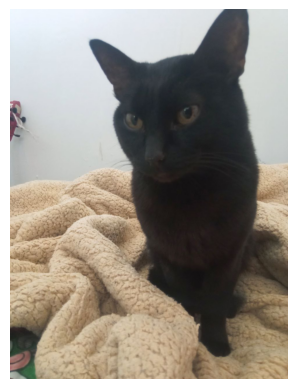


Top-5:

Etiqueta (imagenet-simple)  Probabilidad
              Egyptian Mau      0.534090
               Siamese cat      0.023419
                 tabby cat      0.013965
                       mop      0.013283
                bath towel      0.006286




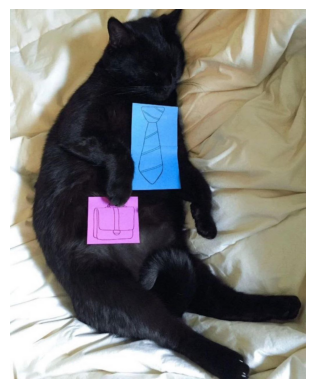


Top-5:

Etiqueta (imagenet-simple)  Probabilidad
                Schipperke      0.073514
               plastic bag      0.040916
                  mail bag      0.021725
                    carton      0.016892
                     quilt      0.013136




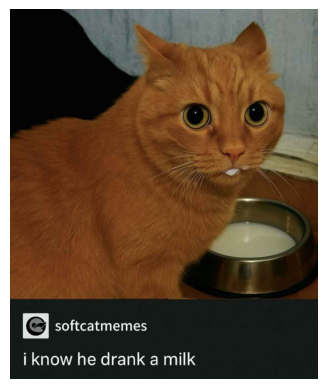


Top-5:

Etiqueta (imagenet-simple)  Probabilidad
                 tiger cat      0.070911
              Egyptian Mau      0.062734
                      sink      0.042521
                 tabby cat      0.036019
               toilet seat      0.020364




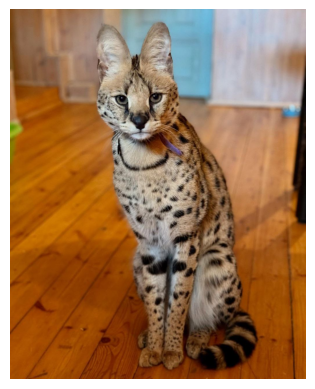


Top-5:

Etiqueta (imagenet-simple)  Probabilidad
              Egyptian Mau      0.122609
                      lynx      0.114571
                   leopard      0.076315
                    jaguar      0.050148
                 tabby cat      0.015613




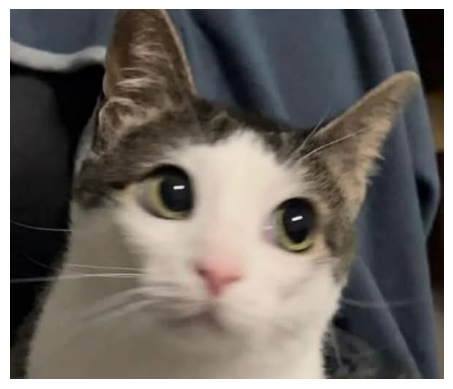


Top-5:

Etiqueta (imagenet-simple)  Probabilidad
              Egyptian Mau      0.164273
                      lynx      0.052394
                 tabby cat      0.039801
                 tiger cat      0.015947
               Siamese cat      0.015377




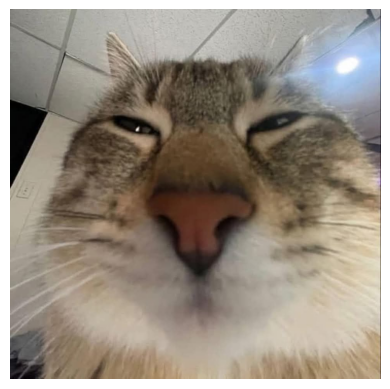


Top-5:

Etiqueta (imagenet-simple)  Probabilidad
                 tabby cat      0.270138
              Egyptian Mau      0.121007
                 tiger cat      0.075120
                      lynx      0.010093
               plastic bag      0.003055




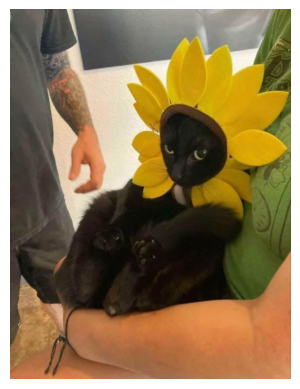


Top-5:

Etiqueta (imagenet-simple)  Probabilidad
                Schipperke      0.150715
               Groenendael      0.060085
        Griffon Bruxellois      0.017588
                       pug      0.014326
            French Bulldog      0.012546




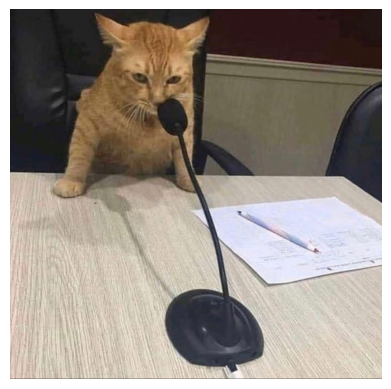


Top-5:

Etiqueta (imagenet-simple)  Probabilidad
              Egyptian Mau      0.085316
                microphone      0.069323
                 tiger cat      0.069202
                 tabby cat      0.036330
                table lamp      0.023939




In [ ]:
import json
import torch
import glob
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from torchvision.models import ResNet50_Weights

# Cargar las etiquetas de ImageNet (versión simple)
with open("/content/drive/MyDrive/images/imagenet-simple-labels.json") as f:
    labels = json.load(f)  # Lista de 1000 etiquetas, indexadas de 0 a 999

# Configurar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar modelo preentrenado y poner en modo evaluación
model = models.resnet50(weights=ResNet50_Weights.DEFAULT)
model = model.to(device)
model.eval()

# Transformaciones para entrada al modelo
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Preprocesar imagen
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)
    return image.to(device)

# Inferencia y top-5
def predict_top5(image_path, topk=5):
    image = preprocess_image(image_path)
    with torch.no_grad():
        output = model(image)

    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    top_probs, top_indices = torch.topk(probabilities, topk)

    # Etiquetas según imagenet-simple-labels.json
    top_labels = [labels[i.item()] for i in top_indices]
    top_probs = [p.item() for p in top_probs]

    return list(zip(top_labels, top_probs))  # [(label, prob), ...]

# Obtener imágenes
carpeta_imagenes = "/content/drive/MyDrive/images"
image_paths = glob.glob(f"{carpeta_imagenes}/*.jpg") + glob.glob(f"{carpeta_imagenes}/*.png")

# Mostrar resultados por imagen
for image_path in image_paths:
    top5 = predict_top5(image_path)
    # Mostrar imagen
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')

    plt.show()

    # Mostrar tabla
    df = pd.DataFrame(top5, columns=["Etiqueta (imagenet-simple)", "Probabilidad"])
    print(f"\nTop-5:\n")
    print(df.to_string(index=False))
    print("\n" + "="*60 + "\n")


El modelo ha analizado la imagen y ha proporcionado una serie de predicciones que reflejan tanto la presencia de un gato como de otros objetos en la escena. La predicción más alta, aunque con una probabilidad relativamente baja del 8.53%, es para "Egyptian Mau", una raza de gato conocida por su pelaje manchado. Sin embargo, la imagen muestra un gato de color naranja, lo cual no es típico de un Egyptian Mau. Esto sugiere que el modelo está teniendo dificultades para identificar con precisión la raza específica del gato, pero al menos reconoce que se trata de un felino.

Una de las predicciones más interesantes es "microphone", con una probabilidad del 6.93%. Esta predicción es notable porque, de hecho, hay un micrófono visible en la imagen. Esto indica que el modelo es capaz de identificar correctamente objetos inanimados en el contexto de la imagen, lo cual es un comportamiento esperado y positivo. Sin embargo, la presencia de "table lamp" como una de las predicciones, aunque con una probabilidad baja, es algo fuera de lo común, ya que no hay una lámpara visible en la imagen. Esto sugiere que el modelo puede estar confundiendo formas o contextos visuales, lo cual es un error que puede ocurrir en sistemas de reconocimiento de imágenes.

En términos de precisión en la categorización, el modelo muestra un rendimiento mixto. Aunque identifica correctamente la presencia de un gato y un micrófono, falla en determinar la raza específica del gato y sugiere incorrectamente la presencia de una lámpara. Esto indica que, aunque el modelo tiene la capacidad de reconocer y categorizar objetos y animales en imágenes, su precisión puede verse afectada por la complejidad de la escena y la similitud visual entre diferentes categorías. En general, el modelo demuestra una comprensión básica de los elementos en la imagen, pero hay margen para mejorar su precisión y especificidad en la identificación de razas de gatos y en la distinción entre objetos similares.

## Fashion MNIST

El objetivo general de este código es entrenar y evaluar modelos de redes neuronales para clasificar imágenes del conjunto de datos Fashion MNIST, que contiene imágenes de diferentes tipos de prendas de vestir. Primero, el código carga y prepara los datos, mostrando algunos ejemplos de imágenes y sus etiquetas. Luego, define y entrena dos tipos de modelos: una red neuronal totalmente conectada y una red neuronal convolucional. Después de entrenar los modelos, los evalúa para ver qué tan bien pueden clasificar las imágenes de prueba. Además, el código incluye una función para visualizar cómo el modelo convolucional representa internamente las imágenes utilizando t-SNE, una técnica para reducir la dimensionalidad de los datos y visualizarlos en un gráfico de dos dimensiones. En resumen, el código busca demostrar cómo se pueden usar diferentes tipos de redes neuronales para reconocer y clasificar imágenes de prendas de vestir.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Transformaciones para normalizar las imágenes
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Cargar los datos de entrenamiento y prueba
train_set = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

test_set = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 197kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.66MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.97MB/s]


### Diseña e implementar una CCN para clasificar al conjunto de datos.


torch.Size([60000, 28, 28])
torch.Size([60000])


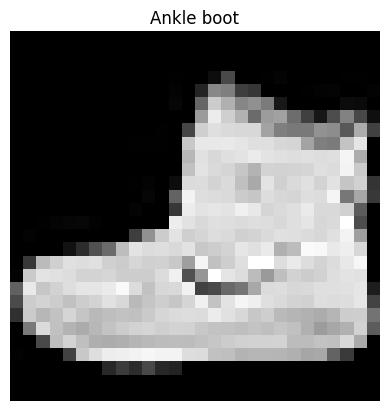

In [ ]:
# Lista de nombres de clases para Fashion MNIST
clases = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Muestra de un ejemplo
print(train_set.data.size())
print(train_set.targets.size())

# Mostrar una imagen de ejemplo con su etiqueta
plt.imshow(train_set.data[0], cmap='gray')
plt.title(clases[train_set.targets[0]])
plt.axis('off')
plt.show()


In [ ]:
# Extraer una muestra del train_loader
data_iter = iter(train_loader)
images, labels = next(data_iter)

print(f"Shape of images: {images.shape}")
print(f"Labels: {labels}")

Shape of images: torch.Size([64, 1, 28, 28])
Labels: tensor([8, 1, 5, 5, 0, 8, 2, 6, 4, 9, 1, 3, 0, 7, 9, 4, 6, 9, 8, 4, 1, 3, 5, 6,
        2, 6, 2, 7, 9, 3, 4, 2, 3, 3, 2, 5, 8, 0, 0, 5, 9, 4, 7, 4, 8, 9, 3, 6,
        5, 7, 4, 2, 4, 5, 3, 1, 5, 6, 0, 5, 5, 8, 9, 3])


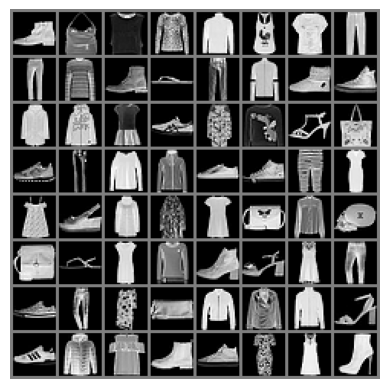

Labels: ['Ankle boot', 'Bag', 'T-shirt/top', 'Pullover', 'Pullover', 'T-shirt/top', 'T-shirt/top', 'Trouser', 'Trouser', 'Pullover', 'Ankle boot', 'Sandal', 'Trouser', 'Coat', 'Ankle boot', 'Sneaker', 'Coat', 'Coat', 'Dress', 'Sneaker', 'Coat', 'Pullover', 'Sandal', 'Bag', 'Sneaker', 'Trouser', 'Pullover', 'Coat', 'Sneaker', 'Sneaker', 'Trouser', 'Dress', 'Dress', 'Sandal', 'Coat', 'Dress', 'Dress', 'Bag', 'Shirt', 'Bag', 'Bag', 'Sandal', 'Dress', 'Pullover', 'Ankle boot', 'Sandal', 'Dress', 'Trouser', 'Sneaker', 'Trouser', 'Dress', 'Bag', 'Coat', 'Coat', 'Coat', 'Sandal', 'Sneaker', 'Coat', 'Shirt', 'Ankle boot', 'Sneaker', 'Dress', 'Dress', 'Ankle boot']


In [ ]:
# Lista de nombres de clases para Fashion MNIST
clases = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Función para mostrar un grid de imágenes
def imshow(img, labels, clases):
    img = img / 2 + 0.5  # Desnormalizar la imagen
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.axis('off')  # Ocultar ejes
    plt.show()

    # Mostrar etiquetas
    print("Labels:", [clases[label] for label in labels])

# Extraer un batch del train_loader
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Mostrar las imágenes en un grid
imshow(torchvision.utils.make_grid(images), labels, clases)


### Ejecuta un entrenamiento y evalúa representan las curvas de error tanto del conjunto de entrenamiento como el conjunto de prueba vs el número de época.


In [ ]:
# Definir el modelo de red neuronal
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Aplanar la imagen
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Se puede usar https://alexlenail.me/NN-SVG/index.html
# Para obtener el diagrama de la arquitectura

# Instanciar el modelo, el criterio de pérdida y el optimizador
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Entrenamiento del modelo
def train_model(model, loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(loader)}")

# Probar el modelo
def test_model(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy: {100 * correct / total}%")

# Entrenar y probar el modelo
train_model(model, train_loader, criterion, optimizer, epochs=5)
test_model(model, test_loader)

Epoch 1, Loss: 1.0138568603979754
Epoch 2, Loss: 0.5578680140917489
Epoch 3, Loss: 0.4888065653855104
Epoch 4, Loss: 0.4536692817518706
Epoch 5, Loss: 0.4305141933564184
Accuracy: 83.66%


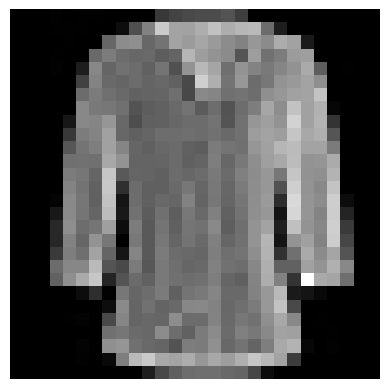

Predicción del modelo: Shirt
Etiqueta real: Shirt


In [ ]:
import random

# Lista de nombres de clases para Fashion MNIST
clases = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Obtener una muestra aleatoria del conjunto de prueba
def evaluate_random_sample(model, test_loader, clases):
    # Selecciona un batch aleatorio
    data_iter = iter(test_loader)
    images, labels = next(data_iter)

    # Selecciona un índice aleatorio dentro del batch
    random_index = random.randint(0, len(images) - 1)

    # Obtener la imagen y etiqueta
    image = images[random_index]
    label = labels[random_index]

    # Desnormalizar y mostrar la imagen
    img = image / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.show()

    # Cambiar la forma de la imagen para que sea compatible con el modelo
    image = image.view(1, 28 * 28)  # Aplanar la imagen

    # Pasar la imagen a través del modelo para predecir
    model.eval()  # Establecer el modelo en modo evaluación
    with torch.no_grad():  # Deshabilitar el cálculo de gradientes
        output = model(image)
        _, predicted = torch.max(output.data, 1)

    # Imprimir la predicción y la etiqueta real
    print(f"Predicción del modelo: {clases[predicted.item()]}")
    print(f"Etiqueta real: {clases[label.item()]}")

# Evaluar con un ejemplo aleatorio del test_loader
evaluate_random_sample(model, test_loader, clases)


In [ ]:
# Definir una red convolucional simple
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Capa convolucional 1: 1 canal de entrada (imagen en escala de grises), 16 filtros de 3x3
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        # Capa convolucional 2: 16 filtros de entrada, 32 filtros de salida
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # Capa de agrupamiento
        self.pool = nn.MaxPool2d(2, 2)
        # Capa completamente conectada
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Primeras capas convolucionales + activación ReLU + MaxPooling
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        # Aplanar la imagen antes de las capas completamente conectadas
        x = x.view(-1, 32 * 7 * 7)
        # Capas completamente conectadas con activación ReLU
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  # Salida final
        return x

# Instanciar el modelo, la función de pérdida y el optimizador
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Función para entrenar el modelo
def train_model(model, loader, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in loader:
            optimizer.zero_grad()  # Limpiar gradientes
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calcular pérdida
            loss.backward()  # Backpropagation
            optimizer.step()  # Actualizar pesos

            running_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(loader)}")

# Entrenar el modelo
train_model(model, train_loader, criterion, optimizer, epochs=5)


Epoch 1, Loss: 1.0365646966040007
Epoch 2, Loss: 0.532832422315566
Epoch 3, Loss: 0.4552459888843331
Epoch 4, Loss: 0.4121435057284481
Epoch 5, Loss: 0.3832479440994354


### Evalúa el desempeño de la CCN entrenada sobre un conjunto de 10 imágenes elegidas al azar.

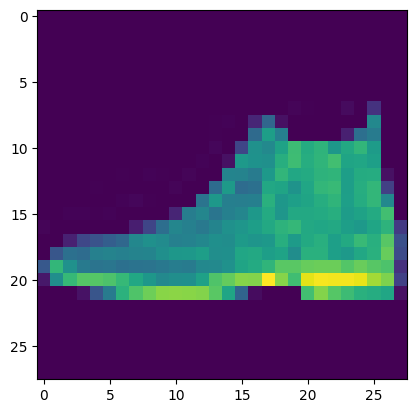

Pred:  9 Real:  9


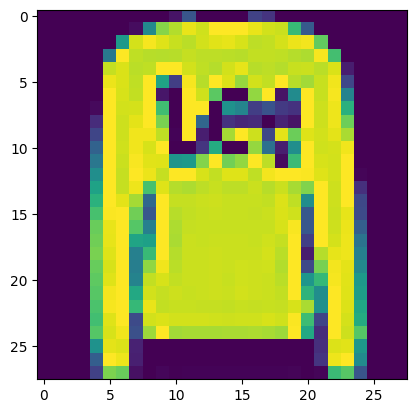

Pred:  2 Real:  2


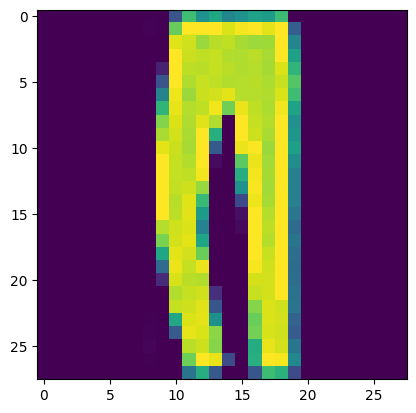

Pred:  1 Real:  1


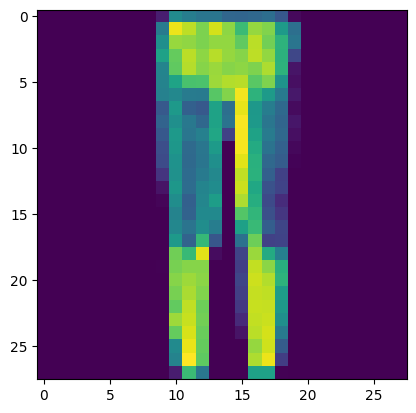

Pred:  1 Real:  1
Accuracy en el conjunto de prueba: 79.69%


In [ ]:
import torch
import matplotlib.pyplot as plt
import torchvision

clases = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Función para mostrar las imágenes
def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar si fue normalizada
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

# Evaluar el modelo en el conjunto de prueba
def evaluate_model(model, test_loader):
    model.eval()  # Poner el modelo en modo evaluación
    correct = 0
    total = 0

    # Desactivar gradientes para evitar cálculos innecesarios
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Mostrar algunas imágenes junto con sus predicciones
            for i in range(4):  # Muestra las primeras 4 imágenes de cada batch
                #plt.subplot(1, 4, i+1)
                #plt.tight_layout()
                imshow(images[i])
                print("Pred: ", predicted[i].item(), "Real: ", labels[i].item())
                #plt.xticks([])
                #plt.yticks([])

            # Solo mostramos las imágenes de un batch, luego rompemos el ciclo
            break

    print(f'Accuracy en el conjunto de prueba: {100 * correct / total:.2f}%')

# Evaluar el rendimiento del modelo
evaluate_model(model, test_loader)


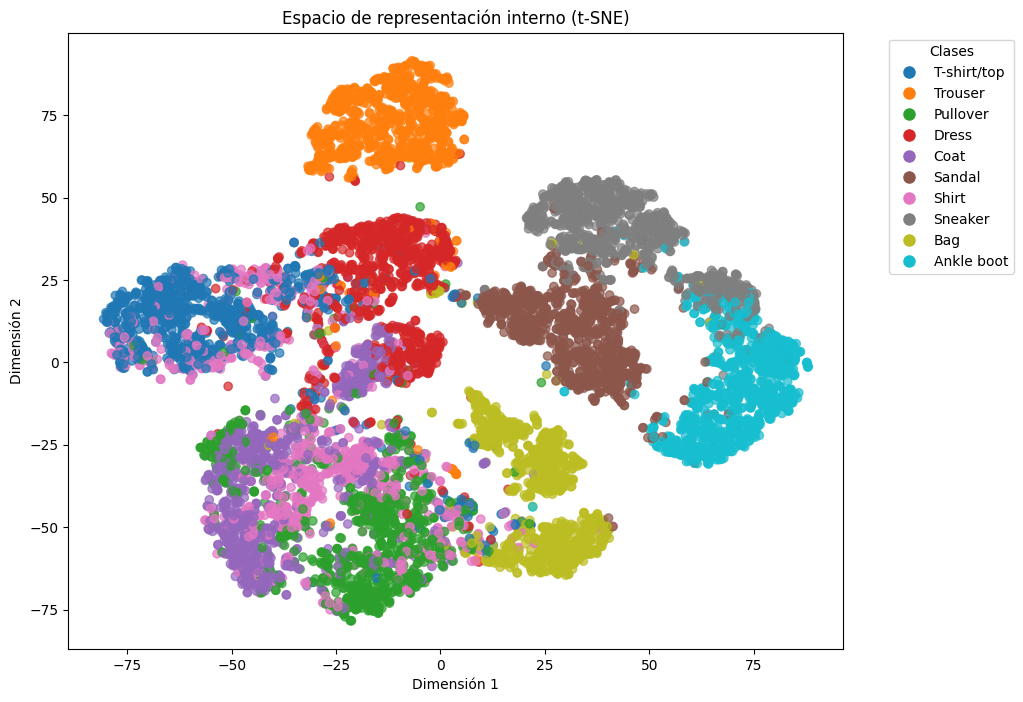

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Lista de nombres de clases para Fashion MNIST
clases = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Función para extraer las representaciones internas
def extract_internal_representations(model, data_loader):
    model.eval()  # Poner el modelo en modo evaluación
    features = []
    labels = []

    with torch.no_grad():  # Desactivar el cálculo de gradientes
        for images, lbls in data_loader:
            # Pasar las imágenes a través del modelo hasta la penúltima capa (representación interna)
            x = images
            x = model.pool(torch.relu(model.conv1(x)))  # Primera capa convolucional
            x = model.pool(torch.relu(model.conv2(x)))  # Segunda capa convolucional
            x = x.view(x.size(0), -1)  # Aplanar las imágenes para la capa completamente conectada
            x = torch.relu(model.fc1(x))  # Extraer la activación de la primera capa FC
            features.append(x)
            labels.append(lbls)

    # Concatenar todas las características y etiquetas
    features = torch.cat(features).cpu().numpy()
    labels = torch.cat(labels).cpu().numpy()

    return features, labels

# Función para reducir la dimensionalidad usando t-SNE y plotear
def plot_representation(features, labels, clases):
    tsne = TSNE(n_components=2, random_state=0)
    reduced_features = tsne.fit_transform(features)

    # Crear el gráfico
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='tab10', alpha=0.7)

    # Crear una leyenda con los nombres de las clases
    legend_handles = []
    for i, label in enumerate(clases):
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='C{}'.format(i), label=label, linestyle='None', markersize=8))

    plt.legend(handles=legend_handles, title="Clases", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title("Espacio de representación interno (t-SNE)")
    plt.xlabel("Dimensión 1")
    plt.ylabel("Dimensión 2")
    plt.show()

# Extraer las representaciones internas y etiquetas
features, labels = extract_internal_representations(model, test_loader)

# Ploteo del espacio de representación con t-SNE
plot_representation(features, labels, clases)


El modelo de red neuronal convolucional (CNN) que entrenamos logró clasificar imágenes del conjunto de datos Fashion MNIST con una precisión del 79.69%. Esto significa que, en la mayoría de los casos, el modelo pudo identificar correctamente qué tipo de prenda aparecía en cada imagen. Durante el entrenamiento, la pérdida del modelo disminuyó de manera constante a lo largo de las cinco épocas, lo cual es una buena señal de que el modelo estaba aprendiendo a mejorar sus predicciones.

Además, utilizamos una técnica llamada t-SNE para visualizar cómo el modelo organiza internamente las imágenes de las diferentes clases de prendas. El gráfico resultante nos mostró que las imágenes de prendas similares tienden a agruparse juntas, lo cual indica que el modelo está aprendiendo a distinguir entre los diferentes tipos de prendas. Aunque la precisión no fue perfecta, el modelo demostró ser bastante efectivo en la tarea de clasificación, y la visualización nos ayudó a entender mejor cómo funciona internamente.